In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib import ticker
from IPython.display import HTML
from flatspin.plotting import plot_vectors
import textwrap

def animate_h_ext(h_ext, title="", interval=100, cmap='rainbow'):
    fig, ax = plt.subplots()
    
    # Axes setup
    ax.set_title(textwrap.fill(title))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)

    # Normalize vectors to unit length
    nmax = np.max([np.linalg.norm(h_ext.reshape((-1,2)), axis=-1)])
    if nmax != 0:
        h_ext /= nmax

    # Positions of vectors
    if len(h_ext.shape) == 4:
        # Spatial field
        xx, yy = np.meshgrid(np.arange(h_ext.shape[1]), np.arange(h_ext.shape[2]))
        XY = np.column_stack([xx.ravel(), yy.ravel()])
    else:
        # Global field (single arrow)
        XY = [[0,0]]

    # Colors
    C = np.linspace(0, 1, len(XY), endpoint=False)
    
    def do_animate(i):
        plot_vectors(XY, h_ext[i], C, clim=(0, 1), cmap=cmap, ax=ax, replace=True, mask_zero=False)

    anim = FuncAnimation(fig, do_animate, frames=len(h_ext), interval=interval, blit=False)
    plt.close() # Only show the animation
    return HTML(anim.to_jshtml(fps=1000/interval))

import flatspin.encoder as en
import matplotlib.pyplot as plt

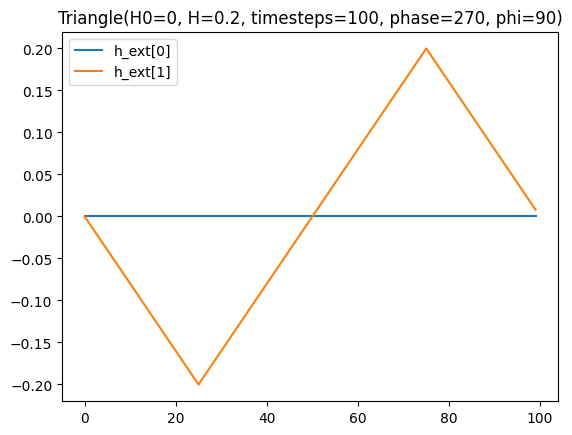

In [3]:
encoder_params = {
    'H': 0.2,
    'phi': 90,
    'phase': 270,
}
encoder = en.Triangle(**encoder_params)

# Use the encoder to create a global external field
input = [1]
h_ext = encoder(input)
plt.title(str(encoder))
plt.plot(h_ext[:,0], label="h_ext[0]")
plt.plot(h_ext[:,1], label="h_ext[1]")
plt.legend();

animate_h_ext(h_ext, str(encoder))

In [12]:
import pandas as pd
from flatspin.model import SquareSpinIceClosed
from flatspin.encoder import Triangle

# Model parameters
model_params = {
    'size': (4, 4),
    'disorder': 0.05,
    'use_opencl': True,
}

# Encoder parameters
encoder_params = {
    'H': 2,
    'phi': 90,
    'phase': 270,
}

# Create the model object
model = SquareSpinIceClosed(**model_params)

# Create the encoder
encoder = Triangle(**encoder_params)

# Use the encoder to create a global external field
input = [1]
h_ext = encoder(input)

# Save spin state over time
spin = []
# Loop over field values and flip spins accordingly
for i, h in enumerate(h_ext):

    model.set_h_ext(h)
    model.relax()
    # Take a snapshot (copy) of the spin state
    spin.append(model.spin.copy())
    '''if (i==0) or (i%9==0):
        plt.figure()
        model.plot()
        plt.title(f'{h}')'''
    
# Create two tables, one for m_tot and one for h_ext
result = {}
result['spin'] = pd.DataFrame(spin)
result['spin'].index.name = 't'
result['h_ext'] = pd.DataFrame(h_ext, columns=['h_extx', 'h_exty'])
result['h_ext'].index.name = 't'

display(result['spin'])
display(result['h_ext'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
t,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,-1,1,1,-1,1,1,1,1,1,-1,1,1,-1,1,1,1,1,1,-1,1,1,-1,1,1,1,1,1,-1,1,1,-1,1,1,1,1
2,1,1,1,1,-1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,-1,1,1,1,1
3,1,1,1,1,-1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,-1,1,1,1,1
4,1,1,1,1,-1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
96,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
97,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


,h_extx,h_exty
t,,
0,0.000000e+00,0.00
1,-4.898587e-18,-0.08
2,-9.797174e-18,-0.16
3,-1.469576e-17,-0.24
4,-1.959435e-17,-0.32
...,...,...
95,2.449294e-17,0.40
96,1.959435e-17,0.32
97,1.469576e-17,0.24


In [30]:
import os
import shutil
import flatspin
from flatspin.data import Dataset

# Where to store the dataset and results
basepath = r'D:\Desktop\flatspin_code\4_Datasets\test'
if os.path.exists(basepath):
    shutil.rmtree(basepath)

# Create params dictionary
# We store both the model params and encoder params
# (there is no overlap between model and encoder params)
params = model_params.copy()
params.update(encoder.get_params())

# Create info dictionary (misc info)
info = {
    'model': f'{model.__class__.__module__}.{model.__class__.__name__}',
    'version': flatspin.__version__,
    'comment': 'My simple dataset'
}

# Create the index table, with a single entry for the above run
# The index must contain a column named 'outdir' which points
# to the location of the result directory / archive file
outdir = 'myrun.npz'
index = pd.DataFrame({'outdir': [outdir]})

# Create the dataset directory
os.makedirs(basepath)

# Create the dataset object
dataset = Dataset(index, params, info, basepath)
display(index)

,outdir
0,myrun.npz


In [31]:
print("Saving dataset:", repr(dataset))
dataset.save()

Saving dataset: Dataset('D:\\Desktop\\flatspin_code\\4_Datasets\\test'): 1 items


In [32]:
from flatspin.data import save_table

# Save the result tables to the npz archive
for name, df in result.items():
    filename = f"{basepath}/{outdir}/{name}"
    print(f"Saving table {name} to {filename}")
    save_table(df, filename)

Saving table spin to D:\Desktop\flatspin_code\4_Datasets\test/myrun.npz/spin
Saving table h_ext to D:\Desktop\flatspin_code\4_Datasets\test/myrun.npz/h_ext


In [35]:
#!tree $dataset.basepath
basepath = r'D:\Desktop\flatspin_code\4_Datasets\test'

for root, dirs, files in os.walk(basepath):
    level = root.replace(basepath, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print('{}{}/'.format(indent, os.path.basename(root)))
    subindent = ' ' * 4 * (level + 1)
    for file in files:
        print('{}{}'.format(subindent, file))

test/
    index.csv
    info.csv
    myrun.npz
    params.csv


In [38]:
#!cat $dataset.basepath/index.csv
!type "D:\Desktop\flatspin_code\4_Datasets\test\index.csv"


# outdir

myrun.npz



In [39]:
dataset = Dataset.read(basepath)
print(dataset)

Dataset: test

params:
 disorder=0.05
 H=2
 H0=0
 phase=270
 phi=90
 size=(4, 4)
 timesteps=100
 use_opencl=True

info:
 comment: My simple dataset
 model: flatspin.model.SquareSpinIceClosed
 version: 2.3

index:
      outdir
0  myrun.npz



In [40]:
from flatspin.data import read_table

print(dataset.tablefile('h_ext'))
df = read_table(dataset.tablefile('h_ext'), index_col='t')
display(df)

D:\Desktop\flatspin_code\4_Datasets\test\myrun.npz\h_ext


,h_extx,h_exty
t,,
0,0.000000e+00,0.00
1,-4.898587e-18,-0.08
2,-9.797174e-18,-0.16
3,-1.469576e-17,-0.24
4,-1.959435e-17,-0.32
...,...,...
95,2.449294e-17,0.40
96,1.959435e-17,0.32
97,1.469576e-17,0.24


In [41]:
dataset.tablefiles()

['D:\\Desktop\\flatspin_code\\4_Datasets\\test\\myrun.npz\\h_ext',
 'D:\\Desktop\\flatspin_code\\4_Datasets\\test\\myrun.npz\\spin']

In [43]:
# Sweep angle phi of external field
phis = np.arange(0, 41, 10)
results = []
for phi in phis:
    # Model params are not swept in this example
    model =SquareSpinIceClosed(**model_params)
    
    # Override phi from encoder_params
    ep = encoder_params.copy()
    ep['phi'] = phi
    encoder = Triangle(**ep)
    h_ext = encoder([1])
    
    spin = []
    for h in h_ext:
        model.set_h_ext(h)
        model.relax()
        spin.append(model.spin.copy())

    result = {}
    result['spin'] = pd.DataFrame(spin)
    result['spin'].index.name = 't'
    result['h_ext'] = pd.DataFrame(h_ext, columns=['h_extx', 'h_exty'])
    result['h_ext'].index.name = 't'

    results.append(result)

print(len(results), 'results')

5 results


In [44]:
# Where to store the dataset and results
basepath = r'D:\Desktop\flatspin_code\4_Datasets\test_phi_sweep'
if os.path.exists(basepath):
    shutil.rmtree(basepath)
os.makedirs(basepath)

# params and info unchanged

# Create the index table, with one entry per value of phi
outdirs = [f'run{i:02d}.npz' for i in range(len(phis))]
index = pd.DataFrame({'phi': phis, 'outdir': outdirs})
display(index)

# Create and save the dataset
dataset = Dataset(index, params, info, basepath)
print("Saving dataset:", repr(dataset))
dataset.save()

# Save the results of each run
for outdir, result in zip(outdirs, results):
    for name, df in result.items():
        filename = f"{basepath}/{outdir}/{name}"
        print(f"Saving table {name} to {filename}")
        save_table(df, filename)

,phi,outdir
0,0,run00.npz
1,10,run01.npz
2,20,run02.npz
3,30,run03.npz
4,40,run04.npz


Saving dataset: Dataset('D:\\Desktop\\flatspin_code\\4_Datasets\\test_phi_sweep'): 5 items
Saving table spin to D:\Desktop\flatspin_code\4_Datasets\test_phi_sweep/run00.npz/spin
Saving table h_ext to D:\Desktop\flatspin_code\4_Datasets\test_phi_sweep/run00.npz/h_ext
Saving table spin to D:\Desktop\flatspin_code\4_Datasets\test_phi_sweep/run01.npz/spin
Saving table h_ext to D:\Desktop\flatspin_code\4_Datasets\test_phi_sweep/run01.npz/h_ext
Saving table spin to D:\Desktop\flatspin_code\4_Datasets\test_phi_sweep/run02.npz/spin
Saving table h_ext to D:\Desktop\flatspin_code\4_Datasets\test_phi_sweep/run02.npz/h_ext
Saving table spin to D:\Desktop\flatspin_code\4_Datasets\test_phi_sweep/run03.npz/spin
Saving table h_ext to D:\Desktop\flatspin_code\4_Datasets\test_phi_sweep/run03.npz/h_ext
Saving table spin to D:\Desktop\flatspin_code\4_Datasets\test_phi_sweep/run04.npz/spin
Saving table h_ext to D:\Desktop\flatspin_code\4_Datasets\test_phi_sweep/run04.npz/h_ext


In [48]:
# Save the results of each run
for outdir, result in zip(outdirs, results):
    for name, df in result.items():
        filename = f"{basepath}/{outdir}/{name}"
        print(f"Saving table {name} to {filename}")
        save_table(df, filename)

Saving table spin to D:\Desktop\flatspin_code\4_Datasets\test_phi_sweep/run00.npz/spin
Saving table h_ext to D:\Desktop\flatspin_code\4_Datasets\test_phi_sweep/run00.npz/h_ext
Saving table spin to D:\Desktop\flatspin_code\4_Datasets\test_phi_sweep/run01.npz/spin
Saving table h_ext to D:\Desktop\flatspin_code\4_Datasets\test_phi_sweep/run01.npz/h_ext
Saving table spin to D:\Desktop\flatspin_code\4_Datasets\test_phi_sweep/run02.npz/spin
Saving table h_ext to D:\Desktop\flatspin_code\4_Datasets\test_phi_sweep/run02.npz/h_ext
Saving table spin to D:\Desktop\flatspin_code\4_Datasets\test_phi_sweep/run03.npz/spin
Saving table h_ext to D:\Desktop\flatspin_code\4_Datasets\test_phi_sweep/run03.npz/h_ext
Saving table spin to D:\Desktop\flatspin_code\4_Datasets\test_phi_sweep/run04.npz/spin
Saving table h_ext to D:\Desktop\flatspin_code\4_Datasets\test_phi_sweep/run04.npz/h_ext


c:\Users\ashiklalkrishna\AppData\Local\Programs\Python\Python311\Lib\zipfile.py:1550: UserWarning: Duplicate name: 'spin.npy'
  return self._open_to_write(zinfo, force_zip64=force_zip64)
c:\Users\ashiklalkrishna\AppData\Local\Programs\Python\Python311\Lib\zipfile.py:1550: UserWarning: Duplicate name: 'h_ext.npy'
  return self._open_to_write(zinfo, force_zip64=force_zip64)


In [49]:
dataset.tablefiles()

[['D:\\Desktop\\flatspin_code\\4_Datasets\\test_phi_sweep\\run00.npz\\h_ext',
  'D:\\Desktop\\flatspin_code\\4_Datasets\\test_phi_sweep\\run00.npz\\h_ext',
  'D:\\Desktop\\flatspin_code\\4_Datasets\\test_phi_sweep\\run00.npz\\spin',
  'D:\\Desktop\\flatspin_code\\4_Datasets\\test_phi_sweep\\run00.npz\\spin'],
 ['D:\\Desktop\\flatspin_code\\4_Datasets\\test_phi_sweep\\run01.npz\\h_ext',
  'D:\\Desktop\\flatspin_code\\4_Datasets\\test_phi_sweep\\run01.npz\\h_ext',
  'D:\\Desktop\\flatspin_code\\4_Datasets\\test_phi_sweep\\run01.npz\\spin',
  'D:\\Desktop\\flatspin_code\\4_Datasets\\test_phi_sweep\\run01.npz\\spin'],
 ['D:\\Desktop\\flatspin_code\\4_Datasets\\test_phi_sweep\\run02.npz\\h_ext',
  'D:\\Desktop\\flatspin_code\\4_Datasets\\test_phi_sweep\\run02.npz\\h_ext',
  'D:\\Desktop\\flatspin_code\\4_Datasets\\test_phi_sweep\\run02.npz\\spin',
  'D:\\Desktop\\flatspin_code\\4_Datasets\\test_phi_sweep\\run02.npz\\spin'],
 ['D:\\Desktop\\flatspin_code\\4_Datasets\\test_phi_sweep\\run03.np

In [50]:
dataset.tablefile('spin')

['D:\\Desktop\\flatspin_code\\4_Datasets\\test_phi_sweep\\run00.npz\\spin',
 'D:\\Desktop\\flatspin_code\\4_Datasets\\test_phi_sweep\\run01.npz\\spin',
 'D:\\Desktop\\flatspin_code\\4_Datasets\\test_phi_sweep\\run02.npz\\spin',
 'D:\\Desktop\\flatspin_code\\4_Datasets\\test_phi_sweep\\run03.npz\\spin',
 'D:\\Desktop\\flatspin_code\\4_Datasets\\test_phi_sweep\\run04.npz\\spin']

In [52]:
# Select run with id 3
print(repr(dataset[3]))
print('id =', dataset[3].id())
dataset[3].index

Dataset('D:\\Desktop\\flatspin_code\\4_Datasets\\test_phi_sweep'): 1 items
id = 3


,phi,outdir
3,30,run03.npz


In [53]:
display(dataset[3:].index)
dataset[3:].row(0)

,phi,outdir
3,30,run03.npz
4,40,run04.npz


phi              30
outdir    run03.npz
Name: 3, dtype: object

In [54]:
for ds in dataset:
    print(repr(ds), ds.row(0)['outdir'])

Dataset('D:\\Desktop\\flatspin_code\\4_Datasets\\test_phi_sweep'): 1 items run00.npz
Dataset('D:\\Desktop\\flatspin_code\\4_Datasets\\test_phi_sweep'): 1 items run01.npz
Dataset('D:\\Desktop\\flatspin_code\\4_Datasets\\test_phi_sweep'): 1 items run02.npz
Dataset('D:\\Desktop\\flatspin_code\\4_Datasets\\test_phi_sweep'): 1 items run03.npz
Dataset('D:\\Desktop\\flatspin_code\\4_Datasets\\test_phi_sweep'): 1 items run04.npz
